In [332]:
# import useful packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set()

mpl.rcParams['lines.linewidth']=2.0
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['axes.labelsize']=15
mpl.rcParams['axes.labelweight']='heavy'
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.titleweight']='heavy'
mpl.rcParams['legend.fontsize']=12



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

import os
import sys

In [4]:
src_dir = os.path.join(os.path.dirname(os.getcwd()),'adfraud')
sys.path.append(src_dir)

In [5]:
data_dir = os.path.join(os.path.dirname(os.getcwd()),'data')

In [6]:
data_filename = 'train_sample.csv'
data_location = os.path.join(data_dir,data_filename)
ad_data = pd.read_csv(data_location)

In [7]:
labels   = ad_data['is_attributed'].values
features = ad_data['ip'].values

In [8]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3)

In [394]:
clf_rnd = RandomForestClassifier(n_estimators=50, max_depth=3,class_weight={0:0.001,1:0.999})

In [395]:
clf_rnd.fit(x_train.reshape(-1,1),y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.001, 1: 0.999},
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [396]:
preds_rnd = clf_rnd.predict_proba(x_test.reshape(-1,1))

In [397]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_rnd[:,1])
auc = metrics.roc_auc_score(y_test, preds_rnd[:,1])
print(auc)

0.6692114315096974


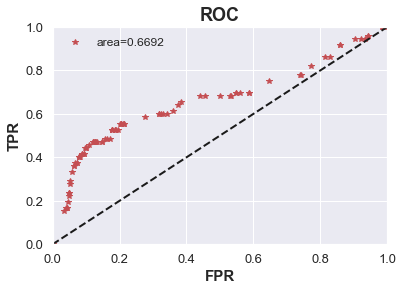

In [398]:
#print(fpr)
plt.plot(fpr,tpr,'r*', label='area={:.4f}'.format(auc))
plt.plot(np.linspace(0,1,20),np.linspace(0,1,20),'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

plt.legend(frameon=False)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

In [309]:
print(preds_rnd[:10,:])
print(y_test[:10])

[[0.72471295 0.27528705]
 [0.53777704 0.46222296]
 [0.60266572 0.39733428]
 [0.68841287 0.31158713]
 [0.55932631 0.44067369]
 [0.633135   0.366865  ]
 [0.22601488 0.77398512]
 [0.44727965 0.55272035]
 [0.66568835 0.33431165]
 [0.633135   0.366865  ]]
[0 0 0 0 0 0 0 0 0 0]


In [303]:
accuracy_score(y_test,np.round(preds_rnd[:,1]))

0.7924333333333333

In [304]:
def pred_from_prob(a,thrshld):
    preds = np.zeros((np.size(a,0),))
    preds[np.where(a[:,1]>thrshld)]=1.0
    #a[np.where(a[:,1]>thrshld),1]=1.0
    #a[np.where(a[:,1]<thrshld),1]=0.0
    #a[np.where(a[:,0]<1-thrshld),0]=0.0
    #a[np.where(a[:,0]>1-thrshld),0]=1.0
    return preds

In [305]:
thrsh = 0.4
preds = pred_from_prob(preds_rnd,thrsh)
print(accuracy_score(y_test[np.where(y_test==1)],preds[np.where(y_test==1)],thrsh))
print(accuracy_score(y_test[np.where(y_test==0)],preds[np.where(y_test==0)],thrsh))

0.6388888888888888
0.5661921946003742


In [252]:
np.shape(np.round(preds_rnd[np.where(y_test==1),1]))

(1, 72)

In [203]:
np.shape(y_test[np.where(y_test==1)])

(72,)

In [308]:
auc = metrics.roc_auc_score(y_test, preds_rnd[:,1])
print(auc)

0.6634547914995991


In [311]:
clf_rnd.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=627019161, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=294699781, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_

In [319]:
thrsh = 0.8
preds = pred_from_prob(preds_rnd,thrsh)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,preds).ravel()
fpr = fp/(fp+tn)
tpr = tp/(tp+fn)
print(fpr,tpr)

0.055466452820101576 0.2916666666666667
